In [126]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras import backend as K
import numpy as np
from matplotlib import pyplot as plt

## Load MNIST data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [33]:
X_train.shape

(60000, 28, 28)

In [31]:
y_train.size

60000

In [54]:
np.expand_dims(X_train, axis=3).shape


(60000, 28, 28, 1)

In [62]:
import pandas as pd

## 

In [106]:
df = pd.DataFrame(y_train)
y_train01234 = df[df[0].isin([0,1,2,3,4])]
yindex_01234 = list(df[df[0].isin([0,1,2,3,4])].index.values)
df2 = pd.DataFrame(X_train.reshape(60000,28*28))
X_train01234 = np.array(df2[df2.index.isin(yindex_01234)])
X_train01234 = np.array(X_train01234).reshape(X_train01234.shape[0],28,28)
X_train01234.shape

(30596, 28, 28)

In [136]:
df = pd.DataFrame(y_test)
y_test01234 = df[df[0].isin([0,1,2,3,4])]
yindex_01234test = list(df[df[0].isin([0,1,2,3,4])].index.values)
df2 = pd.DataFrame(X_test.reshape(X_test.shape[0],28*28))
X_test01234 = np.array(df2[df2.index.isin(yindex_01234test)])
X_test01234 = np.array(X_test01234).reshape(X_test01234.shape[0],28,28)
X_test01234.shape

(5139, 28, 28)

In [107]:
y_train01234.shape

(30596, 1)

In [139]:
y_train01234_cat = to_categorical(y_train01234)
y_test01234_cat = to_categorical(y_test01234)

In [118]:
model = Sequential([
    Dense(20, input_shape=(784,)), #hardest part to get right
        Activation('relu'),
            BatchNormalization(),
                        Dropout(0.1),
    Dense(20, input_shape=(28,28)), #hardest part to get right
        Activation('relu'),
            BatchNormalization(),
                        Dropout(0.1),
    Dense(20, input_shape=(28,28)), #hardest part to get right
        Activation('relu'),
            BatchNormalization(),
                        Dropout(0.1),
    Dense(20, input_shape=(28,28)), #hardest part to get right
        Activation('relu'),
            BatchNormalization(),
                        Dropout(0.1),
    
    
    Dense(5),
        Activation('softmax')  
    
    
])

In [113]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28, 20)            580       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 20)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 20)            80        
_________________________________________________________________
dropout (Dropout)            (None, 28, 20)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 28, 20)            420       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 20)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 20)            8

In [121]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
#compiling the model basically translates our keras code into lower-level TensorFlow / C++

In [129]:
history = model.fit(X_train01234.reshape(X_train01234.shape[0],28*28), y_train01234_cat, epochs=20, batch_size=5000, verbose = 2, validation_split=0.2) # callbacks=[callback],
#epochs -> iteration of backpropagation
#batch_size -> chunk size / sub-epoch

Epoch 1/20
5/5 - 0s - loss: 0.4441 - accuracy: 0.8946 - val_loss: 0.6926 - val_accuracy: 0.7928
Epoch 2/20
5/5 - 0s - loss: 0.4051 - accuracy: 0.9059 - val_loss: 0.6052 - val_accuracy: 0.8538
Epoch 3/20
5/5 - 0s - loss: 0.3755 - accuracy: 0.9138 - val_loss: 0.5315 - val_accuracy: 0.8895
Epoch 4/20
5/5 - 0s - loss: 0.3475 - accuracy: 0.9200 - val_loss: 0.4690 - val_accuracy: 0.9172
Epoch 5/20
5/5 - 0s - loss: 0.3227 - accuracy: 0.9271 - val_loss: 0.4199 - val_accuracy: 0.9333
Epoch 6/20
5/5 - 0s - loss: 0.3010 - accuracy: 0.9298 - val_loss: 0.3785 - val_accuracy: 0.9400
Epoch 7/20
5/5 - 0s - loss: 0.2862 - accuracy: 0.9329 - val_loss: 0.3417 - val_accuracy: 0.9443
Epoch 8/20
5/5 - 0s - loss: 0.2693 - accuracy: 0.9370 - val_loss: 0.3092 - val_accuracy: 0.9484
Epoch 9/20
5/5 - 0s - loss: 0.2517 - accuracy: 0.9420 - val_loss: 0.2781 - val_accuracy: 0.9526
Epoch 10/20
5/5 - 0s - loss: 0.2373 - accuracy: 0.9459 - val_loss: 0.2523 - val_accuracy: 0.9557
Epoch 11/20
5/5 - 0s - loss: 0.2232 - a

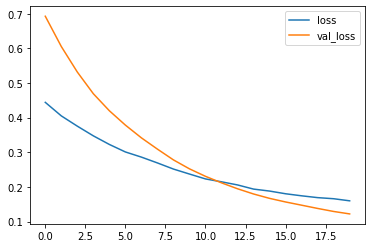

In [130]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

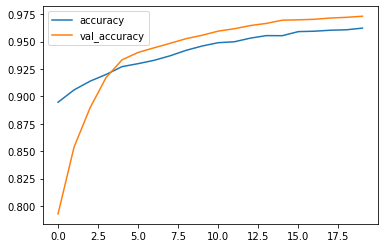

In [131]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])

In [132]:
model.evaluate(X_train01234.reshape(X_train01234.shape[0],28*28), y_train01234_cat)

957/957 [==============================] - 0s 481us/step - loss: 0.1249 - accuracy: 0.9732


[0.12488645315170288, 0.9731664061546326]

In [140]:
model.evaluate(X_test01234.reshape(X_test01234.shape[0],28*28), y_test01234_cat)

161/161 [==============================] - 0s 536us/step - loss: 0.1151 - accuracy: 0.9766


[0.11510292440652847, 0.9766491651535034]